In [1]:
!pip3 install pandas
!pip3 install duckdb
!pip3 install seaborn
!pip3 install plotly
!pip3 install matplotlib

In [2]:
import pandas as pd
import duckdb as db 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("ecommerce_data.csv")
data.head()

,Order_ID,Customer_ID,Product_ID,Product_Name,Category,Price,Quantity,Order_Date,Delivery_Date,Payment_Method
0,48ca9641-6d4c-4f39-b2e9-bf2e64eb97d8,76c18b23-a7d5-4b66-adaa-7aa143af36be,e19cbae9-8203-46ab-a8c8-5933dd0078ba,in,recognize,164.29,6.0,2020-08-26,2020-08-26,Credit Card
1,5ece9c62-f8d7-40eb-9a02-4ea7de0f1c6a,180f5718-28ca-4a35-adea-b74b05da3b08,932a13e1-2c6f-4f64-b644-6e9ae6cef485,list,mission,614.45,9.0,NaN,NaN,PayPal
2,NaN,a48c729f-374a-4a46-ae22-65d691fdcca2,896de70f-ab14-4d12-a6e0-8c3cdddd8c74,society,NaN,377.48,1.0,2020-02-21,2020-02-24,Credit Card
3,NaN,6a8965d2-f002-49ab-bfa3-4412e029fb5e,19fa7a20-d5e4-410f-bd51-b31899fd200e,themselves,or,NaN,1.0,2022-04-09,2022-04-13,Cash
4,d7493946-0d19-4c0e-a037-a985061a6f4f,0e6831fc-a7a4-41b4-b861-41f747702832,4202bb8b-63c1-4b59-8228-96a1d6a6efe2,those,marriage,NaN,1.0,2021-02-12,2021-02-21,Cash


In [4]:
data.isnull().sum()

Order_ID           93
Customer_ID        78
Product_ID         98
Product_Name       97
Category          105
Price             116
Quantity           91
Order_Date         92
Delivery_Date     193
Payment_Method    105
dtype: int64

In [5]:
data = data.dropna()
data.isnull().sum()

Order_ID          0
Customer_ID       0
Product_ID        0
Product_Name      0
Category          0
Price             0
Quantity          0
Order_Date        0
Delivery_Date     0
Payment_Method    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        369 non-null    object 
 1   Customer_ID     369 non-null    object 
 2   Product_ID      369 non-null    object 
 3   Product_Name    369 non-null    object 
 4   Category        369 non-null    object 
 5   Price           369 non-null    float64
 6   Quantity        369 non-null    float64
 7   Order_Date      369 non-null    object 
 8   Delivery_Date   369 non-null    object 
 9   Payment_Method  369 non-null    object 
dtypes: float64(2), object(8)
memory usage: 31.7+ KB


In [7]:
data.head()

,Order_ID,Customer_ID,Product_ID,Product_Name,Category,Price,Quantity,Order_Date,Delivery_Date,Payment_Method
0,48ca9641-6d4c-4f39-b2e9-bf2e64eb97d8,76c18b23-a7d5-4b66-adaa-7aa143af36be,e19cbae9-8203-46ab-a8c8-5933dd0078ba,in,recognize,164.29,6.0,2020-08-26,2020-08-26,Credit Card
8,26f29160-9f9a-4924-8d29-1a365e92c853,5a098d7e-d35a-4592-b4a9-881eb627b870,6a471783-05e4-4743-8cb7-c8ec7d514a9b,take,event,136.01,9.0,2022-02-21,2022-02-24,Cash
9,46dea4b6-3e1e-4f6a-a29a-1e88eaf4c762,d729fa92-0909-4b06-b125-bf4a9de378dd,c39ca2fb-9462-45f3-9fd7-f9f60818bbd0,while,build,962.10,7.0,2021-10-03,2021-10-05,Cash
10,a499504f-687a-4f88-aeda-bf3c401ca168,ac04d16c-dc58-4197-a45d-85b16be5dc46,d82c9e95-99fc-4520-b72b-a554da58889b,before,theory,547.22,9.0,2021-12-29,2022-01-06,Cash
16,89a6d123-a260-460e-a70a-852d9f306750,6ccc37b5-878d-429f-8104-f368a54908e8,a5db15f9-097a-4fb8-b7b9-c2fc08da3650,hair,yes,117.30,7.0,2021-04-11,2021-04-11,Credit Card


Harga Rata-Rata Produk

In [8]:
data['Price'].sum()

196363.4

In [9]:
data["Price"].count()

369

In [10]:
rata_rata = data['Price'].sum() / data['Price'].count()
rata_rata

532.150135501355

Produk Terjual dengan Jumlah Tertinggi

In [11]:
jumlah_tertinggi = data.groupby('Product_Name')['Order_ID'].count()
jumlah_tertinggi = jumlah_tertinggi.sort_values(ascending=False)

In [12]:
jumlah_tertinggi.head(10)

Product_Name
hair          3
tough         3
situation     3
answer        3
long          3
maybe         3
push          3
generation    3
staff         2
deep          2
Name: Order_ID, dtype: int64

Tren Penjualan dari Bulan ke Bulan

In [13]:
import dateutil
import datetime
def parse_date(column_value:str) -> datetime.datetime:
    return dateutil.parser.parse(column_value)
data['Order_Date'] = data['Order_Date'].apply(parse_date)

In [39]:
data['Month'] = data['Order_Date'].dt.month_name()

In [60]:
sales_perbulan = data.groupby('Month')['Order_ID'].count()
urutan_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_perbulan = sales_perbulan.reindex(urutan_bulan)
sales_perbulan

Month
January      41
February     30
March        31
April        30
May          27
June         34
July         31
August       31
September    23
October      31
November     34
December     26
Name: Order_ID, dtype: int64

<Axes: xlabel='Month'>

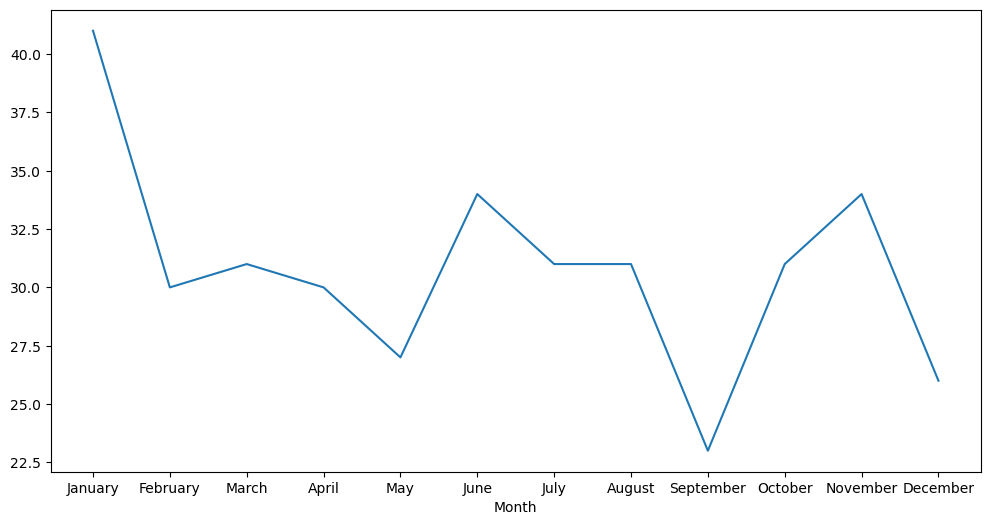

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(x=sales_perbulan.index, y=sales_perbulan.values)

Penjualan berdasarkan hari

In [48]:
data['Day'] = data['Order_Date'].dt.day_name()
data['Day']

0      Wednesday
8         Monday
9         Sunday
10     Wednesday
16        Sunday
         ...    
986    Wednesday
988       Friday
992       Friday
997       Sunday
999    Wednesday
Name: Day, Length: 369, dtype: object

In [61]:
hari_tertentu = data.groupby('Day')['Order_ID'].count()
nama_hari = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Saturday']
hari_tertentu = hari_tertentu.reindex(nama_hari)
hari_tertentu

Day
Sunday       57
Monday       55
Tuesday      48
Wednesday    53
Thursday     57
Saturday     40
Name: Order_ID, dtype: int64

<Axes: xlabel='Day'>

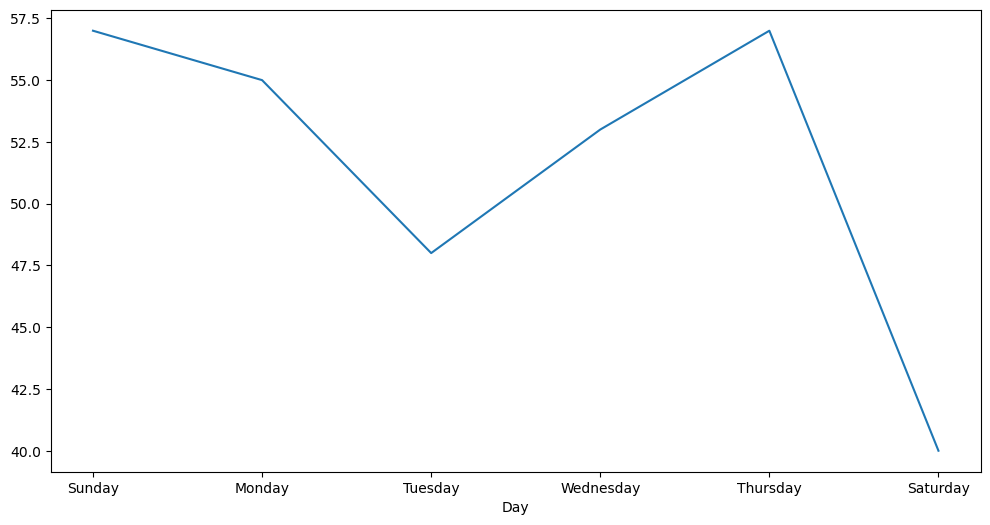

In [65]:
plt.figure(figsize=(12,6))
sns.lineplot(x = hari_tertentu.index, y = hari_tertentu.values)

Distribusi Pembelian Per Pelanggan

In [16]:
pembelian_per_pelanggan = data.groupby(['Customer_ID'])['Order_ID'].count()
pembelian_per_pelanggan

Customer_ID
003e524c-1457-44d2-9b21-6efc1e649793    1
005f978f-4f73-43eb-a8c5-0bff2cce93b9    1
01c5507b-0c18-4c9d-8506-a6a735a2cf56    1
01d43552-50ca-4f6e-88d9-8916636bb747    1
0452d744-d3a1-41e1-a084-99807df7c32d    1
                                       ..
fa6e408c-5e1b-4480-80b2-7bf8da3102b2    1
fc668293-edfd-4f1a-a20e-bcad9fad49cb    1
fd457185-f6d2-4985-b0a9-a76d245ae186    1
fd540cbe-ac74-461d-abe3-7fc5ae3679d7    1
fed0dd7e-abfe-402e-8065-e36b30311084    1
Name: Order_ID, Length: 369, dtype: int64

Pembelian Lebih dari Sekali

In [17]:
new_df = pembelian_per_pelanggan.reset_index()
new_df

,Customer_ID,Order_ID
0,003e524c-1457-44d2-9b21-6efc1e649793,1
1,005f978f-4f73-43eb-a8c5-0bff2cce93b9,1
2,01c5507b-0c18-4c9d-8506-a6a735a2cf56,1
3,01d43552-50ca-4f6e-88d9-8916636bb747,1
4,0452d744-d3a1-41e1-a084-99807df7c32d,1
...,...,...
364,fa6e408c-5e1b-4480-80b2-7bf8da3102b2,1
365,fc668293-edfd-4f1a-a20e-bcad9fad49cb,1
366,fd457185-f6d2-4985-b0a9-a76d245ae186,1
367,fd540cbe-ac74-461d-abe3-7fc5ae3679d7,1


In [18]:
lebih_dari_sekali = db.query("SELECT * FROM new_df WHERE Order_ID > 1")
lebih_dari_sekali.df()

,Customer_ID,Order_ID


Metode Pembayaran Paling Sering Digunakan

In [19]:
metode_pembayaran = data.groupby('Payment_Method')['Order_ID'].count()
metode_pembayaran

Payment_Method
Cash           121
Credit Card    131
PayPal         117
Name: Order_ID, dtype: int64

In [20]:
new_df = metode_pembayaran.reset_index()
new_df

,Payment_Method,Order_ID
0,Cash,121
1,Credit Card,131
2,PayPal,117


Korelasi Metode Pembayaran dan Total Belanja

<BarContainer object of 3 artists>

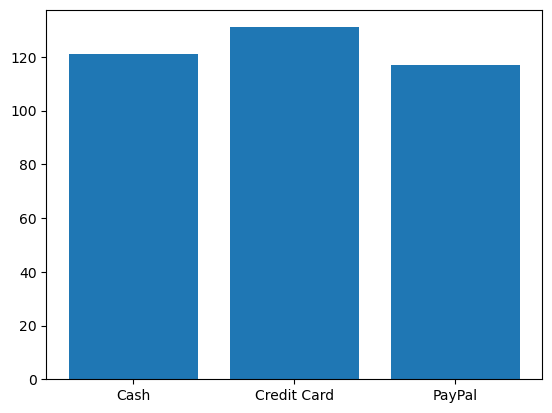

In [21]:
plt.bar(x= new_df['Payment_Method'], height=new_df['Order_ID'])

Persentase Keterlambatan

In [22]:
data['Delivery_Date'] = data['Delivery_Date'].apply(parse_date)
data['Delivery_Date']

0     2020-08-26
8     2022-02-24
9     2021-10-05
10    2022-01-06
16    2021-04-11
         ...    
986   2020-11-08
988   2020-05-24
992   2022-06-26
997   2021-03-08
999   2020-04-17
Name: Delivery_Date, Length: 369, dtype: datetime64[ns]

In [23]:
new_df = data[['Delivery_Date', 'Order_Date', 'Category']]
new_df

,Delivery_Date,Order_Date,Category
0,2020-08-26,2020-08-26,recognize
8,2022-02-24,2022-02-21,event
9,2021-10-05,2021-10-03,build
10,2022-01-06,2021-12-29,theory
16,2021-04-11,2021-04-11,yes
...,...,...,...
986,2020-11-08,2020-11-04,responsibility
988,2020-05-24,2020-05-22,room
992,2022-06-26,2022-06-17,news
997,2021-03-08,2021-03-07,bill


In [24]:
for row,column in new_df.iterrows():
    if column['Delivery_Date'] == column['Order_Date']:
        new_df.at[row, 'Status'] = 'Tepat Waktu'
    else:
        new_df.at[row, 'Status'] = 'Terlambat'

new_df['Status']


/var/folders/16/3klh70sn4rd_4qw1rx6f2yhw0000gn/T/ipykernel_4967/1612787783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.at[row, 'Status'] = 'Tepat Waktu'


0      Tepat Waktu
8        Terlambat
9        Terlambat
10       Terlambat
16     Tepat Waktu
          ...     
986      Terlambat
988      Terlambat
992      Terlambat
997      Terlambat
999      Terlambat
Name: Status, Length: 369, dtype: object

In [25]:
persentase = new_df.groupby('Status')['Status'].count()
persentase

Status
Tepat Waktu     29
Terlambat      340
Name: Status, dtype: int64

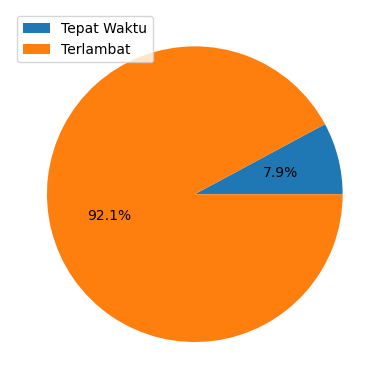

In [26]:
plt.pie(persentase, autopct='%1.1f%%')
plt.legend(persentase.index)

Pola Keterlambatan Berdasarkan Kategori Produk

In [27]:
terlambat = db.query("SELECT * FROM new_df WHERE Status = 'Terlambat'").df()
terlambat

,Delivery_Date,Order_Date,Category,Status
0,2022-02-24,2022-02-21,event,Terlambat
1,2021-10-05,2021-10-03,build,Terlambat
2,2022-01-06,2021-12-29,theory,Terlambat
3,2022-12-23,2022-12-15,forward,Terlambat
4,2020-08-29,2020-08-20,spend,Terlambat
...,...,...,...,...
335,2020-11-08,2020-11-04,responsibility,Terlambat
336,2020-05-24,2020-05-22,room,Terlambat
337,2022-06-26,2022-06-17,news,Terlambat
338,2021-03-08,2021-03-07,bill,Terlambat


In [28]:
category_terlambat = terlambat.groupby('Category')['Status'].count()
category_terlambat

Category
TV         1
across     1
act        1
address    2
admit      1
          ..
woman      1
year       1
yes        2
yet        2
you        2
Name: Status, Length: 281, dtype: int64